In [36]:
import pandas as pd
import csv
import numpy as np
from scipy.stats import linregress
from matplotlib import pyplot as plt
import hvplot.pandas



wildfires_df = pd.read_csv("Downloads/US_Lightning_Forest_Fires.csv")
wildfires_df.head()

,Unnamed: 0,index,FIRE_YEAR,Fire_Date,DISCOVERY_TIME,STAT_CAUSE_DESCR,Days_to_extinguish_fire,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,FIPS_CODE,FIPS_NAME
0,0,1,2004,05-12-2004,845.0,Lightning,0.0,1530.0,0.25,A,38.933056,-120.404444,CA,61.0,Placer
1,1,3,2004,06-28-2004,1600.0,Lightning,5.0,1400.0,0.10,A,38.559167,-119.913333,CA,3.0,Alpine
2,2,4,2004,06-28-2004,1600.0,Lightning,5.0,1200.0,0.10,A,38.559167,-119.933056,CA,3.0,Alpine
3,3,5,2004,06-30-2004,1800.0,Lightning,1.0,1600.0,0.10,A,38.635278,-120.103611,CA,5.0,Amador
4,4,6,2004,07-01-2004,1800.0,Lightning,1.0,1400.0,0.10,A,38.688333,-120.153333,CA,17.0,El Dorado


In [37]:
del wildfires_df["STAT_CAUSE_DESCR"]
del wildfires_df["Unnamed: 0"]


wildfires_df.head()

,index,FIRE_YEAR,Fire_Date,DISCOVERY_TIME,Days_to_extinguish_fire,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,FIPS_CODE,FIPS_NAME
0,1,2004,05-12-2004,845.0,0.0,1530.0,0.25,A,38.933056,-120.404444,CA,61.0,Placer
1,3,2004,06-28-2004,1600.0,5.0,1400.0,0.10,A,38.559167,-119.913333,CA,3.0,Alpine
2,4,2004,06-28-2004,1600.0,5.0,1200.0,0.10,A,38.559167,-119.933056,CA,3.0,Alpine
3,5,2004,06-30-2004,1800.0,1.0,1600.0,0.10,A,38.635278,-120.103611,CA,5.0,Amador
4,6,2004,07-01-2004,1800.0,1.0,1400.0,0.10,A,38.688333,-120.153333,CA,17.0,El Dorado


In [38]:
texas_df['FIPS_NAME'] = texas_df['FIPS_NAME'].fillna("No Name Given")

In [39]:
texas_df = wildfires_df.loc[(wildfires_df["STATE"] == "TX"), :]
texas_df.head()

,index,FIRE_YEAR,Fire_Date,DISCOVERY_TIME,Days_to_extinguish_fire,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,FIPS_CODE,FIPS_NAME
120,287,2005,04-07-2005,1800.0,1.0,1550.0,55.0,C,31.354167,-95.085278,TX,NaN,NaN
2719,5219,2005,09-11-2005,1300.0,0.0,1600.0,17.5,C,36.233056,-102.350000,TX,111.0,Dallam
2729,5243,2005,07-06-2005,1500.0,0.0,1835.0,9.0,B,30.580556,-95.763889,TX,NaN,NaN
2730,5246,2005,07-14-2005,815.0,0.0,1008.0,0.1,A,31.464444,-95.132778,TX,NaN,NaN
2735,5256,2005,08-03-2005,1630.0,0.0,1910.0,2.0,B,30.688611,-95.367500,TX,NaN,NaN


In [40]:
county_count = texas_df["FIPS_NAME"].value_counts()
county_name = county_count.index
county_occurences = county_count.values
x_axis = np.arange(len(county_name.unique()))
tick_locations = [value for value in x_axis]

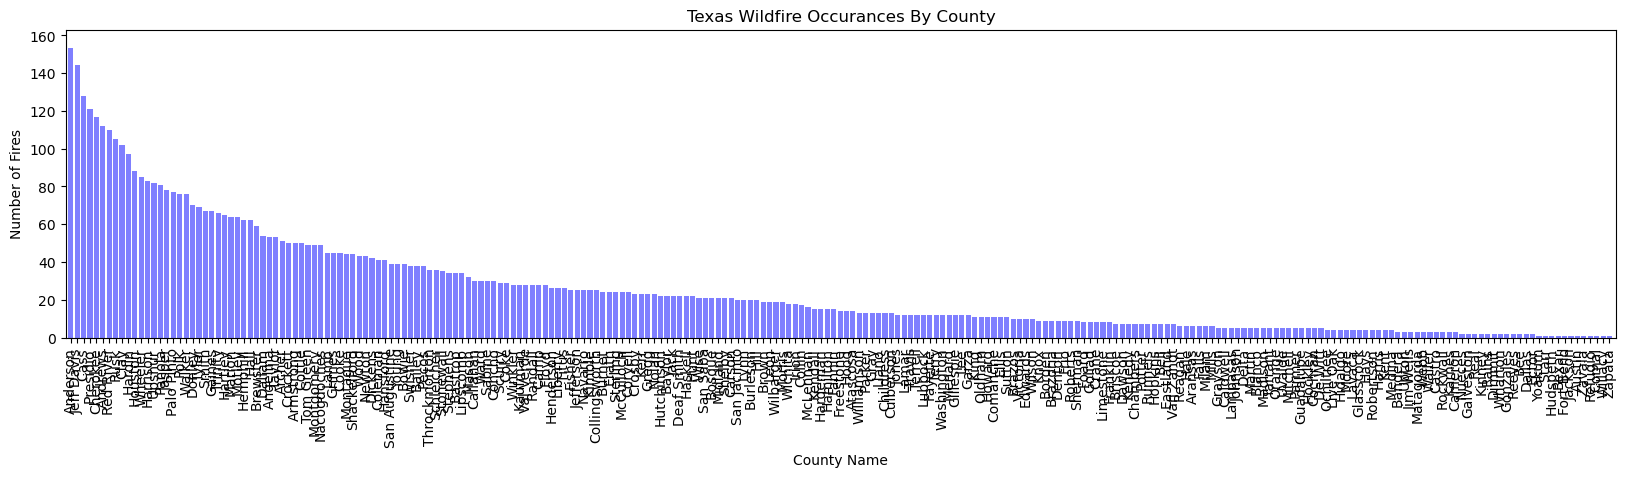

In [41]:
plt.figure(figsize=(20,4))
plt.bar(x_axis, county_occurences, color='b', alpha=0.5, align='center')
plt.xticks(tick_locations, county_name, rotation="vertical")
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(county_occurences)+10)
plt.title("Texas Wildfire Occurances By County")
plt.xlabel("County Name")
plt.ylabel("Number of Fires")
plt.savefig("texas_df.png")
plt.show()

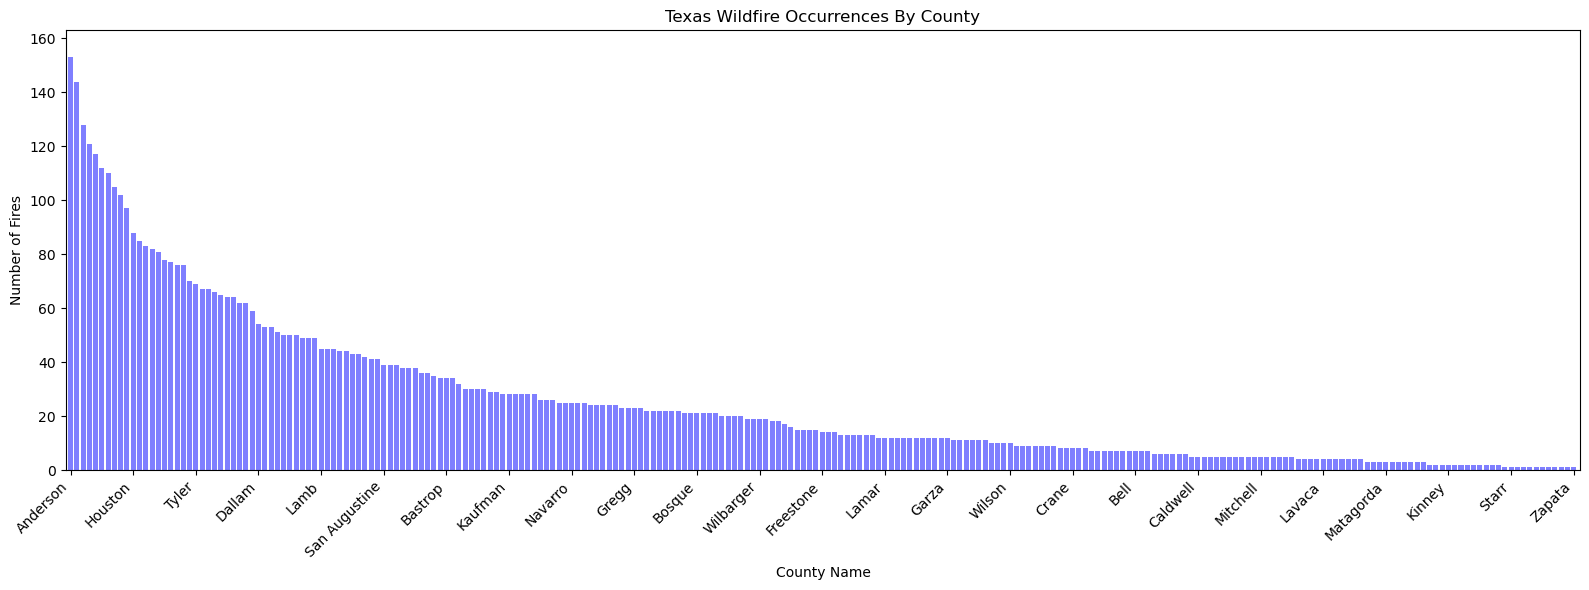

In [42]:
x_axis = range(len(county_name))
plt.figure(figsize=(16, 6))  
tick_locations = x_axis[::10]  #Showing every 10th county name to mkae it more legible 
plt.bar(x_axis, county_occurences, color='b', alpha=0.5, align='center')
plt.xticks(tick_locations, [county_name[i] for i in tick_locations], rotation=45, ha='right')

plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(county_occurences) + 10)
plt.title("Texas Wildfire Occurrences By County")
plt.xlabel("County Name")
plt.ylabel("Number of Fires")
plt.tight_layout()  
plt.savefig("improved_texas_df.png")
plt.show()

In [43]:
texas_df['FIPS_NAME'] = texas_df['FIPS_NAME'].fillna("No Name Given")
fire_count_year = texas_df["FIRE_YEAR"].value_counts().sort_index()
year = fire_count_year.index.sort_values()
x_axis = np.arange(len(year.unique()))
tick_locations = [value for value in x_axis]

C:\Users\HannahTheWhat\AppData\Local\Temp\ipykernel_10172\1104388349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_df['FIPS_NAME'] = texas_df['FIPS_NAME'].fillna("No Name Given")


C:\Users\HannahTheWhat\AppData\Local\Temp\ipykernel_10172\1034080478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_df["Fire_Date"] = pd.to_datetime(texas_df["Fire_Date"], format="%m-%d-%Y")
C:\Users\HannahTheWhat\AppData\Local\Temp\ipykernel_10172\1034080478.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_df["Year"] = texas_df["Fire_Date"].dt.year


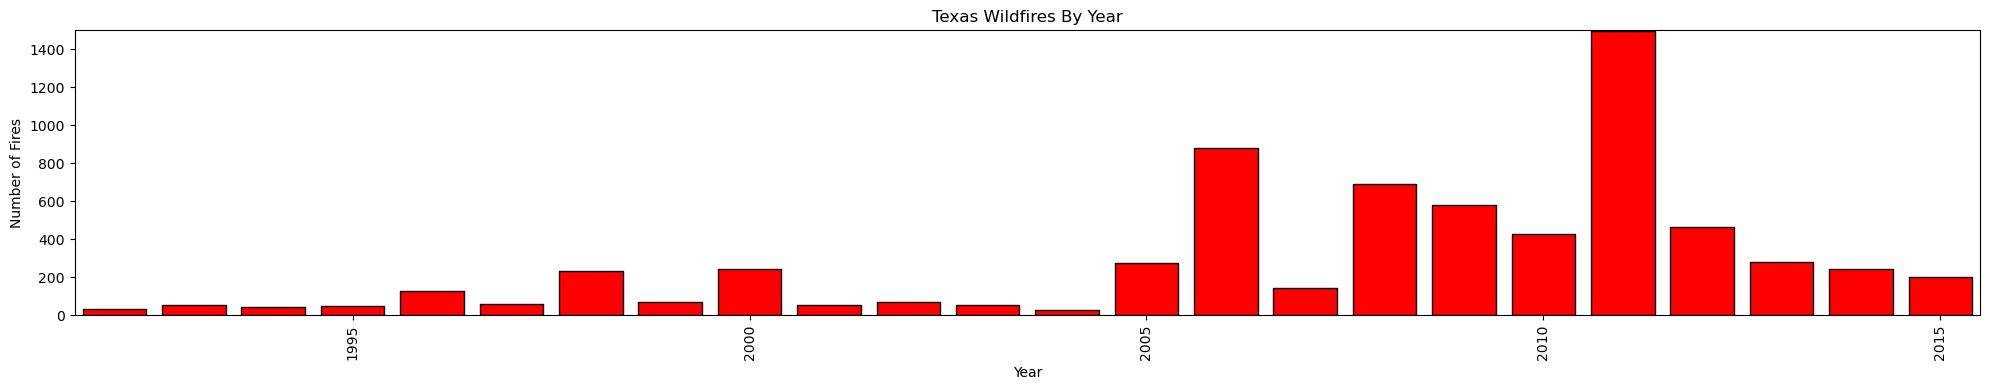

In [44]:
texas_df["Fire_Date"] = pd.to_datetime(texas_df["Fire_Date"], format="%m-%d-%Y")


texas_df["Year"] = texas_df["Fire_Date"].dt.year


fires_by_year = texas_df["Year"].value_counts().sort_index()


plt.figure(figsize=(20, 4))
plt.bar(fires_by_year.index, fires_by_year, color='r', edgecolor='black')

plt.xticks(rotation=90)
plt.xlim(min(fires_by_year.index) - 0.5, max(fires_by_year.index) + 0.5)
plt.ylim(0, max(fires_by_year) + 5)

plt.title("Texas Wildfires By Year")
plt.xlabel("Year")
plt.ylabel("Number of Fires")

plt.tight_layout()
plt.show()

C:\Users\HannahTheWhat\AppData\Local\Temp\ipykernel_10172\38727633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_df["Fire_Date"] = pd.to_datetime(texas_df["Fire_Date"], format="%m-%d-%Y")
C:\Users\HannahTheWhat\AppData\Local\Temp\ipykernel_10172\38727633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_df["Month"] = texas_df["Fire_Date"].dt.month


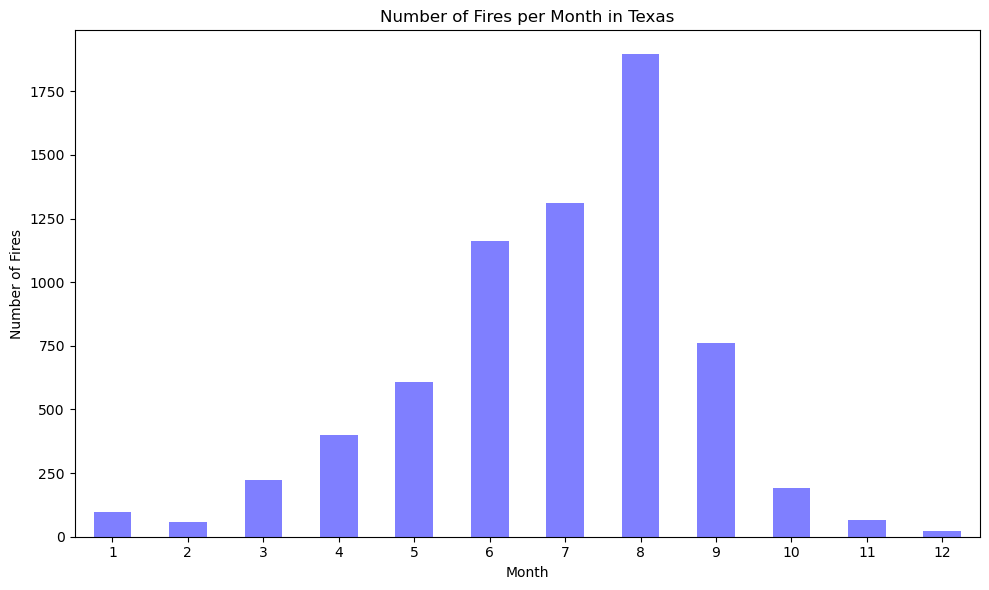

In [45]:

texas_df["Fire_Date"] = pd.to_datetime(texas_df["Fire_Date"], format="%m-%d-%Y")
texas_df["Month"] = texas_df["Fire_Date"].dt.month
fires_by_month = texas_df.groupby("Month").size()
plt.figure(figsize=(10, 6))
fires_by_month.plot(kind="bar", color='b', alpha=0.5)
plt.title("Number of Fires per Month in Texas")
plt.xlabel("Month")
plt.ylabel("Number of Fires")

plt.xticks(rotation=0)  
plt.tight_layout()
plt.show()

In [46]:
texas_fire_size = texas_df[["FIRE_SIZE","FIRE_YEAR"]]

bins = [0,1,100,1000,10000,50000,65000]
group_names = ["<1 Acre","<100 Acres","<1000 Acres","<10000 Acres","<50000 Acres",">50000 Acres"]

texas_fire_size["Fire Size Summary"] = pd.cut(texas_fire_size["FIRE_SIZE"], bins, labels=group_names,include_lowest=True)
texas_fire_size.head()

C:\Users\HannahTheWhat\AppData\Local\Temp\ipykernel_10172\82893099.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_fire_size["Fire Size Summary"] = pd.cut(texas_fire_size["FIRE_SIZE"], bins, labels=group_names,include_lowest=True)


,FIRE_SIZE,FIRE_YEAR,Fire Size Summary
120,55.0,2005,<100 Acres
2719,17.5,2005,<100 Acres
2729,9.0,2005,<100 Acres
2730,0.1,2005,<1 Acre
2735,2.0,2005,<100 Acres


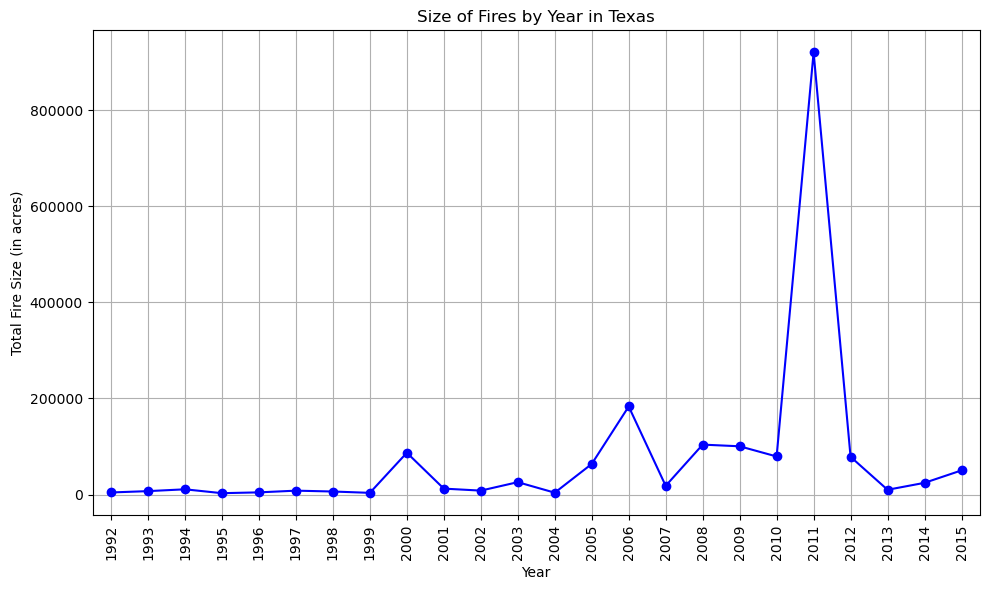

In [47]:
texas_df = texas_df.sort_values(by="FIRE_SIZE")

fires_by_year = texas_df.groupby("FIRE_YEAR")["FIRE_SIZE"].sum()
plt.figure(figsize=(10, 6))
plt.plot(fires_by_year.index, fires_by_year, marker='o', color='b')
plt.title("Size of Fires by Year in Texas")
plt.xlabel("Year")
plt.ylabel("Total Fire Size (in acres)")
plt.xticks(fires_by_year.index, rotation=90)
plt.xlim(min(fires_by_year.index) - 0.5, max(fires_by_year.index) + 0.5)
plt.tight_layout()
plt.grid(True) 

plt.show()

In [48]:
# Filter the DataFrame down only to those columns to chart
size_vs_days_ext = texas_df[["FIRE_SIZE", "Days_to_extinguish_fire"]]


# Set the index to be "State" so they will be used as labels
size_vs_days_ext = size_vs_days_ext.set_index("FIRE_SIZE")

size_vs_days_ext.head()

,Days_to_extinguish_fire
FIRE_SIZE,
0.01,NaN
0.01,NaN
0.01,NaN
0.01,NaN
0.01,NaN


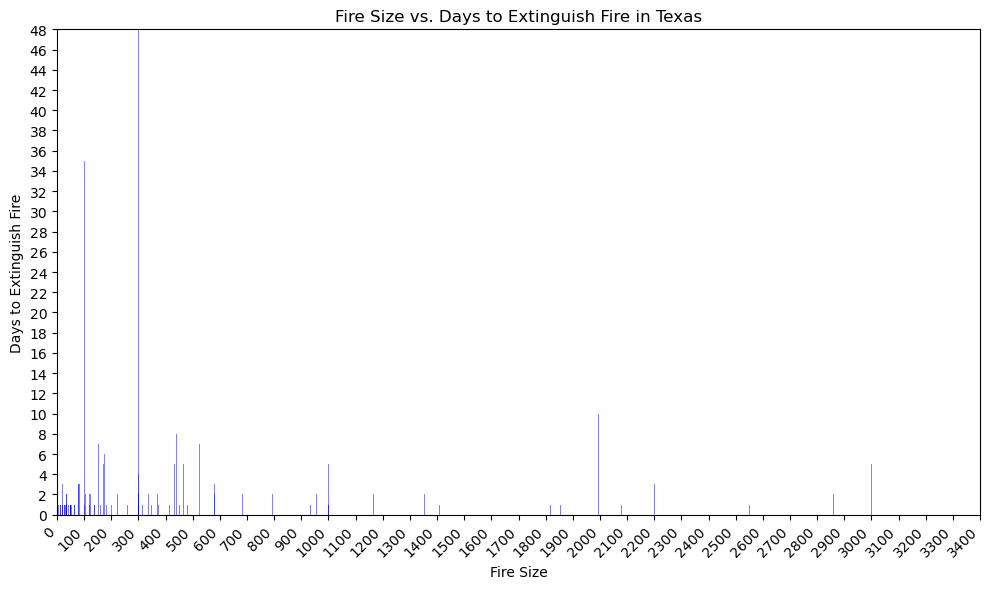

In [35]:

size_vs_days_ext = size_vs_days_ext.sort_index()


x_values = size_vs_days_ext.index
y_values = size_vs_days_ext["Days_to_extinguish_fire"]


plt.figure(figsize=(10, 6))
plt.bar(x_values, y_values, color='b', alpha=0.5, align='center')

plt.title("Fire Size vs. Days to Extinguish Fire in Texas")
plt.xlabel("Fire Size")
plt.ylabel("Days to Extinguish Fire")

plt.xticks(rotation=45, ha='right') 


plt.xlim(0, 20)
plt.xticks(range(0, 3500, 100))  

plt.ylim(0, 10)
plt.yticks(range(0, 50, 2))  

plt.tight_layout()  

plt.show()